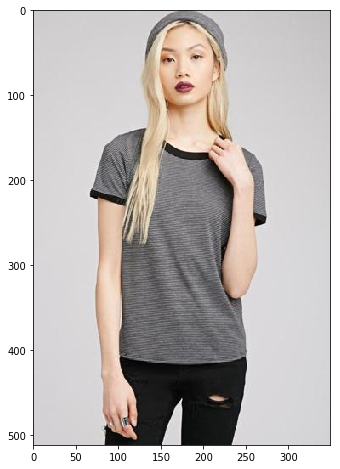

In [1]:
import matplotlib.pyplot as plt
import math
from matplotlib import patches
import numpy as np
from skimage import io
import matplotlib.lines as mlines
%matplotlib inline
"""
image: img/img_00000001.jpg  
clothes_type: 1  
variation_type: 1 

"""

def get_distance(p, q):
    """
    Calculating distance from p axes to q
    d(P, Q) = sqrt((x2-x1)^2 + (y2-y1)^2))
    """
    d = math.sqrt((q[0]-p[0])**2 + (q[1]-p[1])**2)
    return round(d, 2)

image = io.imread('img/img_00000001.jpg')
im_height, im_width = image.shape[0], image.shape[1]
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)
plt.show()

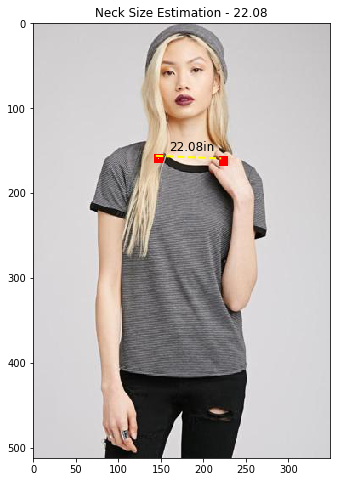

Neck size for the image above is between UK XS and S (approx.) 
ref: http://www.asos.com/Men/shirts-size-guide/?szgid=19&szgtid=2&r=2


In [2]:
"""
Collar Size Estimation Landmarks:

left_collar::
landmark_location_x_1: 144  
landmark_location_y_1: 156

right collar::
landmark_location_x_2: 221 
landmark_location_y_2: 159
"""

left_collar = patches.Rectangle((144, 156), 5, 5,linewidth=5,edgecolor='r',facecolor='none')
right_collar = patches.Rectangle((221, 159), 5, 5,linewidth=5,edgecolor='r',facecolor='none')

P = (144, 156)
Q = (221, 159)
d = get_distance(P, Q)
d_inches = round(d / im_width * 100, 2)

# # # Add the patch to the Axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)
ax.set_title('Neck Size Estimation - {}'.format(d_inches))
ax.add_patch(left_collar)
ax.add_patch(right_collar)
ax.plot((144, 221), (156, 159), '--', lw=2, color='yellow', ms=10)
ax.text(160, 150, '{}in'.format(d_inches),color='black',fontsize=12)
plt.show()
print("Neck size for the image above is between UK XS and S (approx.) \nref: http://www.asos.com/Men/shirts-size-guide/?szgid=19&szgtid=2&r=2")

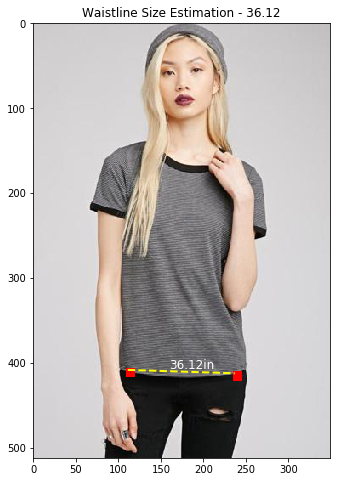

Waist size for the image above is 10 UK Size (approx.) 
ref: http://www.asos.com/Women/jeans-trousers-and-leggings-size-guide/?szgid=5&szgtid=1


In [3]:
"""
Waisline Estimation Landmarks:

left waistline
landmark_location_x_6: 111
landmark_location_y_6: 408

right waistline
landmark_location_x_7: 237
landmark_location_y_7: 412 
"""

left_waistline  = patches.Rectangle((111, 408), 5, 5,linewidth=5,edgecolor='r',facecolor='none')
right_waistline = patches.Rectangle((237, 412), 5, 5,linewidth=5,edgecolor='r',facecolor='none')

P = (111, 408)
Q = (237, 412)

d = get_distance(P, Q)
d_inches = round(d / im_width * 100, 2)

# # # Add the patch to the Axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)
ax.set_title('Waistline Size Estimation - {}'.format(d_inches))
ax.add_patch(left_waistline)
ax.add_patch(right_waistline)
ax.plot((111, 237), (408, 412), '--', lw=2, color='yellow', ms=10)
ax.text(160, 407, '{}in'.format(d_inches),color='white',fontsize=12)
plt.show()
print("Waist size for the image above is 10 UK Size (approx.) \nref: http://www.asos.com/Women/jeans-trousers-and-leggings-size-guide/?szgid=5&szgtid=1")

In [ ]:
import json, pickle
import requests
from skimage import io
from skimage.transform import resize
from azure.cognitiveservices.vision.customvision.training import training_api
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateEntry, Region

training_key = "673f2a8c5fa2461d954e58a1a5c45ab4"
pid = '630e7c21-5d05-4f14-8dab-3213d6e1bd3f'
trainer = training_api.TrainingApi(training_key)

headers = {
    # Request headers
    'Content-Type': 'application/octet-stream',
    'Training-key': '673f2a8c5fa2461d954e58a1a5c45ab4',
}
URL = 'https://southcentralus.api.cognitive.microsoft.com'
endpoint = '/customvision/v1.1/Training/projects/{}/images/image'.format(pid)

tagged_images_with_regions = []

tags = {
    'left_collar': 'dff7604e-9cb8-414f-8044-4e9abcd0f222',
    'right_collar': '4d6d9004-940f-44cc-a43f-a4d30102af92'
}

training_data_set = pickle.load(open('train_set_sizing.pk', 'rb'))

upload_limit = 2000

for elem in training_data_set[upload_limit:]:
    file_name = elem[0]
    cl_x,cl_y,cr_x,cr_y = elem[1], elem[2], elem[3], elem[4]
    image = io.imread(file_name)
    height = float(image.shape[0])
    width = float(image.shape[1])
    regions = [ Region(tag_id=tags['left_collar'], 
                       left=float(cl_x)/width, 
                       top=float(cl_y)/height, 
                       width=float(10)/width, 
                       height=float(10)/height),
              Region(tag_id=tags['right_collar'], 
                       left=float(cr_x)/width, 
                       top=float(cr_y)/height, 
                       width=float(10)/width, 
                       height=float(10)/height),
              ]
    with open(file_name, mode="rb") as image_contents:
        tagged_images_with_regions.append(ImageFileCreateEntry(
            name=file_name, contents=image_contents.read(), regions=regions))


In [12]:
batch_size = 50
offset = 0
limit = offset + batch_size

while upload_limit != 0:
    print('Uploading - offset: {}, limit: {}'.format(offset, limit))
    trainer.create_images_from_files(pid, images=tagged_images_with_regions[offset: limit])
    upload_limit -= batch_size
    offset += batch_size
    limit += batch_size

Accept header absent and forced to application/json


Uploading - offset: 0, limit: 50


Accept header absent and forced to application/json


Uploading - offset: 50, limit: 100


Accept header absent and forced to application/json


Uploading - offset: 100, limit: 150


Accept header absent and forced to application/json


Uploading - offset: 150, limit: 200


Accept header absent and forced to application/json


Uploading - offset: 200, limit: 250


Accept header absent and forced to application/json


Uploading - offset: 250, limit: 300


Accept header absent and forced to application/json


Uploading - offset: 300, limit: 350


Accept header absent and forced to application/json


Uploading - offset: 350, limit: 400


Accept header absent and forced to application/json


Uploading - offset: 400, limit: 450


Accept header absent and forced to application/json


Uploading - offset: 450, limit: 500


Accept header absent and forced to application/json


Uploading - offset: 500, limit: 550


Accept header absent and forced to application/json


Uploading - offset: 550, limit: 600


Accept header absent and forced to application/json


Uploading - offset: 600, limit: 650


Accept header absent and forced to application/json


Uploading - offset: 650, limit: 700


Accept header absent and forced to application/json


Uploading - offset: 700, limit: 750


Accept header absent and forced to application/json


Uploading - offset: 750, limit: 800


Accept header absent and forced to application/json


Uploading - offset: 800, limit: 850


Accept header absent and forced to application/json


Uploading - offset: 850, limit: 900


Accept header absent and forced to application/json


Uploading - offset: 900, limit: 950


Accept header absent and forced to application/json


Uploading - offset: 950, limit: 1000


Accept header absent and forced to application/json


Uploading - offset: 1000, limit: 1050


Accept header absent and forced to application/json


Uploading - offset: 1050, limit: 1100


Accept header absent and forced to application/json


Uploading - offset: 1100, limit: 1150


Accept header absent and forced to application/json


Uploading - offset: 1150, limit: 1200


Accept header absent and forced to application/json


Uploading - offset: 1200, limit: 1250


Accept header absent and forced to application/json


Uploading - offset: 1250, limit: 1300


Accept header absent and forced to application/json


Uploading - offset: 1300, limit: 1350


Accept header absent and forced to application/json


Uploading - offset: 1350, limit: 1400


Accept header absent and forced to application/json


Uploading - offset: 1400, limit: 1450


Accept header absent and forced to application/json


Uploading - offset: 1450, limit: 1500


Accept header absent and forced to application/json


Uploading - offset: 1500, limit: 1550


Accept header absent and forced to application/json


Uploading - offset: 1550, limit: 1600


Accept header absent and forced to application/json


Uploading - offset: 1600, limit: 1650


Accept header absent and forced to application/json


Uploading - offset: 1650, limit: 1700


Accept header absent and forced to application/json


Uploading - offset: 1700, limit: 1750


Accept header absent and forced to application/json


Uploading - offset: 1750, limit: 1800


Accept header absent and forced to application/json


Uploading - offset: 1800, limit: 1850


Accept header absent and forced to application/json


Uploading - offset: 1850, limit: 1900


Accept header absent and forced to application/json


Uploading - offset: 1900, limit: 1950


Accept header absent and forced to application/json


Uploading - offset: 1950, limit: 2000
